# Training Yolo with MS Coco 

In [18]:
# all imports
%load_ext autoreload
%autoreload 2
import sys
import os
sys.path.insert(0, os.path.abspath('./src'))


from torchvision.datasets import CocoDetection
from torchvision import transforms

from datasets.preprocess import *
from datasets.YoloCocoDataset import YoloCocoDataset

from yolo.yolo import Yolo



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
# where to find ms coco, how to preprocess and how to batch 

COCO_IMAGES_DIR = '/home/peter/datasets/coco-small/cocoapi/images/train2014'
COCO_ANNOTATIONS_FILE = '/home/peter/datasets/coco-small/cocoapi/annotations/instances_train2014_10_per_category.json'
batch_size = 2

image_and_target_transform = Compose([
        SquashResize(416),
        ConvertXandYToCenterOfBoundingBox(),
        ScaleBboxRelativeToSize(416),
        # PadToFit(255),
        # RandomCrop(200),
        # RandomHorizontalFlip(),,
        CocoToTensor()
    ])


dataset = CocoDetection(root=COCO_IMAGES_DIR, annFile=COCO_ANNOTATIONS_FILE, transforms=image_and_target_transform)
ya_yolo_dataset = YoloCocoDataset(dataset=dataset, batch_size=batch_size)


loading annotations into memory...
Done (t=0.16s)
creating index...
index created!


In [27]:
cfg_file = './cfg/yolov3.cfg'
weight_file = './cfg/yolov3.weights'

batch_size = 2
model = Yolo(cfg_file=cfg_file, batch_size=batch_size)
model.load_weights(weight_file)


Loading weights. Please Wait...



Number of images:  800


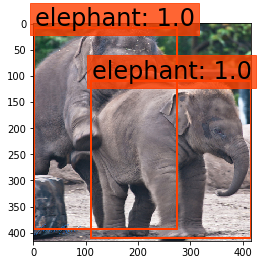

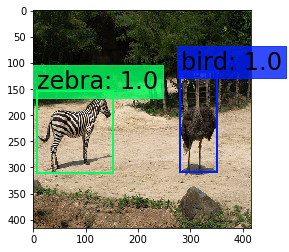

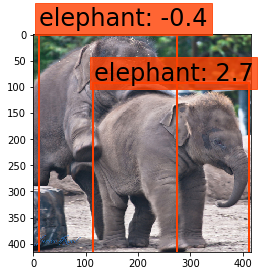

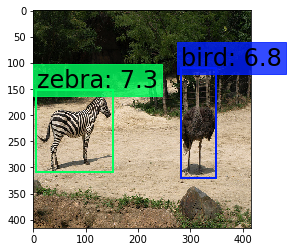

Epoch: 2, Batch: 1, Avg. Loss: 6.2279830030532e-05


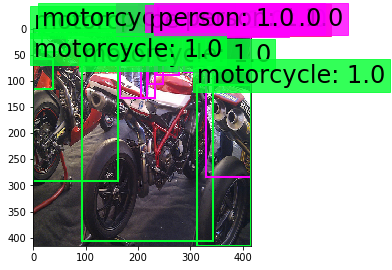

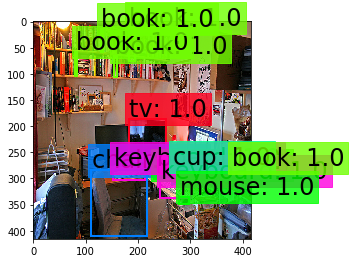

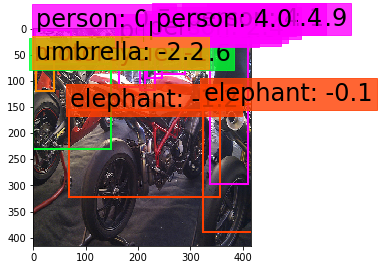

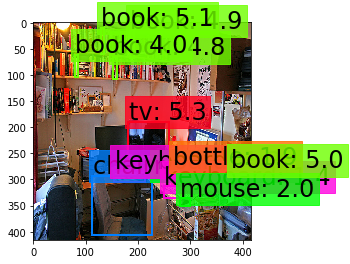

Epoch: 2, Batch: 2, Avg. Loss: 0.0007128161495907612


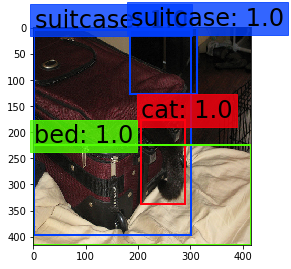

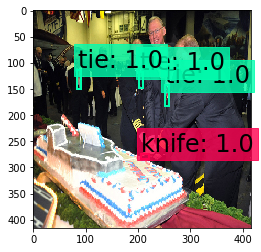

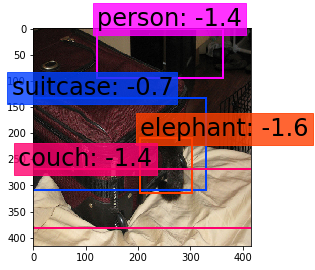

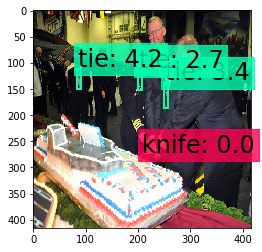

In [ ]:
from yolo.training import training

training(model=model, ya_yolo_dataset=ya_yolo_dataset, num_epochs=1, limit=10, debug=True, print_every=1)